# Non-linear equations and root-finding

This notebook contains the code for gifs illustrating various root-finding methods

In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import imageio
# Default style parameters (feel free to modify as you see fit)
params = {'legend.fontsize': 'large',
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large',
         'xtick.direction':'in',
         'ytick.direction':'in',
         }
plt.rcParams.update(params)

### Bisection method


In [2]:
def func1(x):
    return x + np.exp(-x) - 2.
    
def func2(x):
    return x**3 - x - 1.

# Returns full sequence of intervals
def bisection_method_full(
    f,                    # The function whose root we are trying to find
    a,                    # The left boundary
    b,                    # The right boundary
    tolerance = 1.e-10,   # The desired accuracy of the solution
    ):
    ret = []
    fa = f(a)                           # The value of the function at the left boundary
    fb = f(b)                           # The value of the function at the right boundary
    if (fa * fb > 0.):
        return None                     # Bisection method is not applicable
    
    while ((b-a) > tolerance):
        c = (a + b) / 2.                # Take the midpoint
        fc = f(c)                       # Calculate the function at midpoint
        
        
        if (fc * fa < 0.):              
            ret.append([b,a,c,fb,fa,fc])
            b = c                       # The midpoint is the new right boundary
            fb = fc
        else: 
            ret.append([a,b,c,fa,fb,fc])
            a = c                       # The midpoint is the new left boundary
            fa = fc
    
    c = (a + b) / 2.
    fc = f(c)
    ret.append([a,b,c,fa,fb,fc])
    return ret 

a = 0.
b = 3.
print("Solving the equation x + e^-x - 2 = 0 on an interval (", a, ",", b, ") using bisection method")
xroot1 = bisection_method_full(func1,a,b)
print("The solution is x = ", xroot1[-1][2])

print("Solving the equation x^3 - x - 1 = 0 on an interval (", a, ",", b, ") using bisection method")
xroot2 = bisection_method_full(func2,a,b)
print("The solution is x = ", xroot2[-1][2])


Solving the equation x + e^-x - 2 = 0 on an interval ( 0.0 , 3.0 ) using bisection method
The solution is x =  1.8414056604233338
Solving the equation x^3 - x - 1 = 0 on an interval ( 0.0 , 3.0 ) using bisection method
The solution is x =  1.324717957249959


In [3]:
# Animation
from matplotlib.animation import FuncAnimation

def bisection_animation(func, labelfunc, a, b, tolerance = 1.e-10):
    # Solve the root
    xroot = bisection_method_full(func,a,b)
    xref = np.linspace(0,3,100)
    fref = func(xref)
    
    # Prepare plot
    fig, ax = plt.subplots()
    
    plt.xlabel("x")
    plt.ylabel("f(x)")
    plt.title("Bisection Method")
    plt.plot(xref,fref, label = labelfunc)
    plt.axhline(y = 0., color = 'black', linestyle = '--')
    
    def animate_bisection(ind):
        ax.clear();
        plt.title("Bisection Method: Iteration " + str(ind + 1))
        plt.plot(xref,fref, label = labelfunc)
        plt.axhline(y = 0., color = 'black', linestyle = '--')
        plt.plot([xroot[ind][0]], [xroot[ind][3]], 'o',color = 'black', mfc = 'none')
        plt.plot([xroot[ind][1]], [xroot[ind][4]], 'o',color = 'black')
        plt.plot([xroot[ind][2]], [xroot[ind][5]], 'o',label='midpoint',color = 'red')
        plt.plot([xroot[ind][0],xroot[ind][2]],[xroot[ind][3],xroot[ind][5]], 'r--')
        labx = '${x_{' + str(ind+1) + '} = ' + str(xroot[ind][2]) + '}$'
        ax.text(0.05, 0.6, labx, transform=ax.transAxes, size = 15)
        plt.legend()
        if (ind == len(xroot) - 1):
            plt.close(fig)
        #plt.show()
    
    ani_ret = FuncAnimation(fig, animate_bisection, frames=len(xroot), interval=2000, repeat=False)
    # plt.close(fig)
    return ani_ret
    

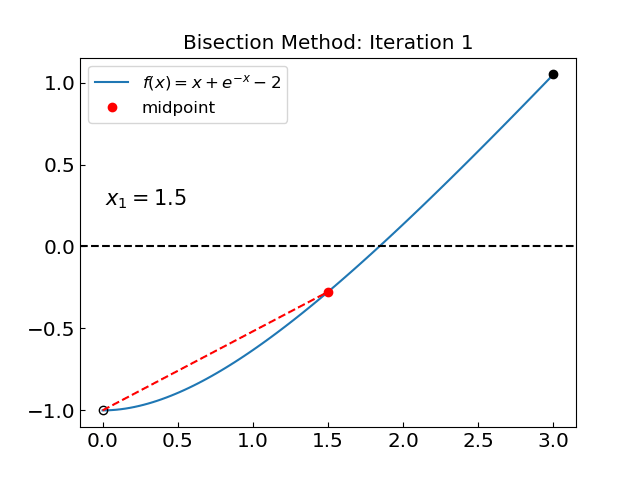

In [4]:
# %matplotlib notebook

func = func1
labelfunc = '${f(x) = x + e^{-x} - 2}$'
labelgif = 'bisect-func1.gif'

ani = bisection_animation(func, labelfunc, 0, 3)

ani.save(labelgif)

from IPython.display import display, Image
display(Image(filename=labelgif))

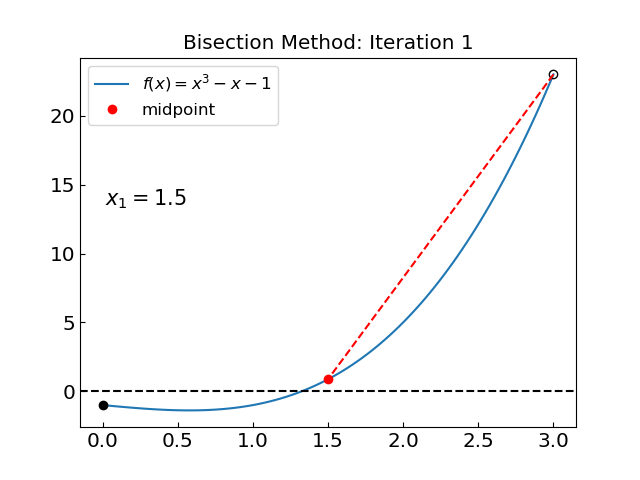

In [5]:
# %matplotlib notebook

func = func2
labelfunc = '${f(x) = x^3 - x - 1}$'
labelgif = 'bisect-func2.gif'

ani = bisection_animation(func, labelfunc, 0, 3)

ani.save(labelgif)

from IPython.display import display, Image
display(Image(filename=labelgif))

### False position method


In [6]:
def falseposition_method_full(
    f,                    # The function whose root we are trying to find
    a,                    # The left boundary
    b,                    # The right boundary
    tolerance = 1.e-10,   # The desired accuracy of the solution
    max_iterations = 100  # Number of iterations
    ):
    ret = []
    fa = f(a)                            # The value of the function at the left boundary
    fb = f(b)                            # The value of the function at the right boundary
    
    xprev = (a+b) / 2.                   # Estimate of the solution from the previous step           
    for i in range(max_iterations):
        xnew = a - fa * (b - a) / (fb - fa) # Take the point where straight line between a and b crosses y = 0
        fnew = f(xnew)                      # Calculate the function at midpoint
        # print(a,b,c)
        
        if (fnew * fa < 0.):      
            ret.append([b,a,xnew,fb,fa,fnew])
            b = xnew                        # The intersection is the new right boundary
            fb = fnew
        else:                           
            ret.append([a,b,xnew,fa,fb,fnew])
            a = xnew                        # The midpoint is the new left boundary
            fa = fnew

        if (abs(xnew-xprev) < tolerance):
            return ret
    
        xprev = xnew
    return ret                  

In [7]:
# Animation
from matplotlib.animation import FuncAnimation

def falseposition_animation(func, labelfunc, a, b, tolerance = 1.e-10):
    # Solve the root
    xroot = falseposition_method_full(func,a,b)
    xref = np.linspace(0,3,100)
    fref = func(xref)
    
    # Prepare plot
    fig, ax = plt.subplots()
    
    plt.xlabel("x")
    plt.ylabel("f(x)")
    plt.title("False Position Method")
    plt.plot(xref,fref, label = labelfunc)
    plt.axhline(y = 0., color = 'black', linestyle = '--')
    
    def animate_falseposition(ind):
        a = xroot[ind][0]
        b = xroot[ind][1]
        xnew = xroot[ind][2]
        ax.clear();
        plt.title("False Position Method: Iteration " + str(ind + 1))
        plt.plot(xref,fref, label = labelfunc)
        plt.axhline(y = 0., color = 'black', linestyle = '--')
        plt.plot([a], [func(a)], 'o',color = 'black', mfc = 'none')
        plt.plot([b], [func(b)], 'o',color = 'black')
        plt.plot([a,b], [func(a),func(b)], linestyle = ':', label='secant',color = 'blue')
        plt.plot([xnew,xnew], [0.,func(xnew)], linestyle = ':', color = 'red')
        plt.plot([a,xnew], [func(a),func(xnew)], linestyle = ':', color = 'red')
        plt.plot([xnew], [func(xnew)], 'o',color = 'red', label = 'new point')
        labx = '${x_{' + str(ind+1) + '} = ' + str(xnew) + '}$'
        ax.text(0.05, 0.6, labx, transform=ax.transAxes, size = 15)
        plt.legend()
        if (ind == len(xroot) - 1):
            plt.close(fig)
        #plt.show()
    
    ani_ret = FuncAnimation(fig, animate_falseposition, frames=len(xroot), interval=2000, repeat=False)
    # plt.close(fig)
    return ani_ret
    

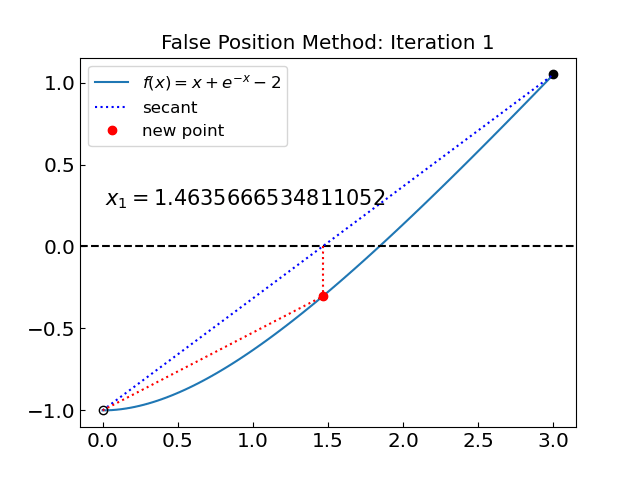

In [8]:
# %matplotlib notebook

func = func1
labelfunc = '${f(x) = x + e^{-x} - 2}$'
labelgif = 'falsepos-func1.gif'

ani = falseposition_animation(func, labelfunc, 0, 3)

ani.save(labelgif)

from IPython.display import display, Image
display(Image(filename=labelgif))

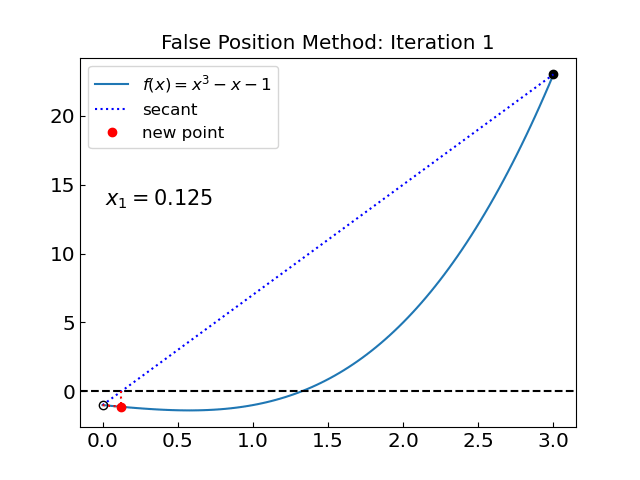

In [9]:
# %matplotlib notebook

func = func2
labelfunc = '${f(x) = x^3 - x - 1}$'
labelgif = 'falsepos-func2.gif'

ani = falseposition_animation(func, labelfunc, 0, 3)

ani.save(labelgif)

from IPython.display import display, Image
display(Image(filename=labelgif))

### Secant method

In [10]:
def secant_method_full(
    f,                    # The function whose root we are trying to find
    a,                    # The left boundary
    b,                    # The right boundary
    tolerance = 1.e-10,   # The desired accuracy of the solution
    max_iterations = 100  # Number of iterations
    ):
    ret = []
    fa = f(a)                            # The value of the function at the left boundary
    fb = f(b)                            # The value of the function at the right boundary
    if (fa * fb > 0.):
        return None                      # False positin method is not applicable
    
    xprev = a                            # Estimate of the solution from the previous step  
    
    for i in range(max_iterations):
        xnew = a - fa * (b - a) / (fb - fa) # Take the point where straight line between a and b crosses y = 0
        fnew = f(xnew)                      # Calculate the function at midpoint
        # print(a,b,c)
        
        ret.append([a,b,xnew,fa,fb,fnew])
        
        b = a
        fb = fa
        a = xnew
        fa = fnew

        if (abs(xnew-xprev) < tolerance):
            return ret
    
        xprev = xnew
        
    print("Secant method failed to converge to a required precision in " + str(max_iterations) + " iterations")
    print("The error estimate is ", abs(xnew - xprev))
        
    return ret                  

In [11]:
# Animation
from matplotlib.animation import FuncAnimation

def secant_animation(func, labelfunc, a, b, tolerance = 1.e-10):
    # Solve the root
    xroot = secant_method_full(func,a,b)
    xref = np.linspace(a0,b0,100)
    fref = func(xref)
    
    # Prepare plot
    fig, ax = plt.subplots()
    
    plt.xlabel("x")
    plt.ylabel("f(x)")
    plt.title("Secant Method")
    plt.plot(xref,fref, label = labelfunc)
    plt.axhline(y = 0., color = 'black', linestyle = '--')
    
    def animate_secant(ind):
        a = xroot[ind][0]
        b = xroot[ind][1]
        xnew = xroot[ind][2]
        
        xleft  = min([a0,xnew,a,b])
        xright = max([b0,xnew,a,b])
        xref = np.linspace(xleft,xright,100)
        fref = func(xref)
    
        ax.clear();
        plt.title("Secant Method: Iteration " + str(ind + 1))
        plt.plot(xref,fref, label = labelfunc)
        plt.axhline(y = 0., color = 'black', linestyle = '--')
        plt.plot([a,b], [func(a),func(b)], linestyle = ':', label='secant',color = 'blue')
        plt.plot([a,xnew], [func(a),0.], linestyle = ':', color = 'blue')
        plt.plot([a], [func(a)], 'o',color = 'black', label = '${x_{n}}$')
        plt.plot([b], [func(b)], 'o',color = 'black', mfc = 'none')
        plt.plot([xnew,xnew], [0.,func(xnew)], linestyle = ':', color = 'red')
        plt.plot([a,xnew], [func(a),func(xnew)], linestyle = ':', color = 'red')
        plt.plot([xnew], [func(xnew)], 'o',color = 'red', label = '${x_{n+1}}$')
        labx = '${x_{' + str(ind+2) + '} = ' + str(xnew) + '}$'
        ax.text(0.1, 0.6, labx, transform=ax.transAxes, size = 15)
        plt.legend()
        if (ind == len(xroot) - 1):
            plt.close(fig)
        #plt.show()
    
    ani_ret = FuncAnimation(fig, animate_secant, frames=len(xroot), interval=2000, repeat=False)
    # plt.close(fig)
    return ani_ret
    

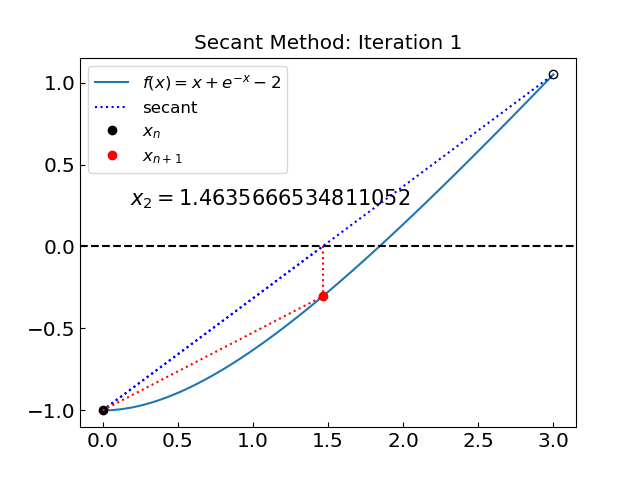

In [12]:
func = func1
labelfunc = '${f(x) = x + e^{-x} - 2}$'
labelgif = 'secant-func1.gif'

a0 = 0.
b0 = 3.

ani = secant_animation(func, labelfunc, 0., 3.)

ani.save(labelgif)

from IPython.display import display, Image
display(Image(filename=labelgif))

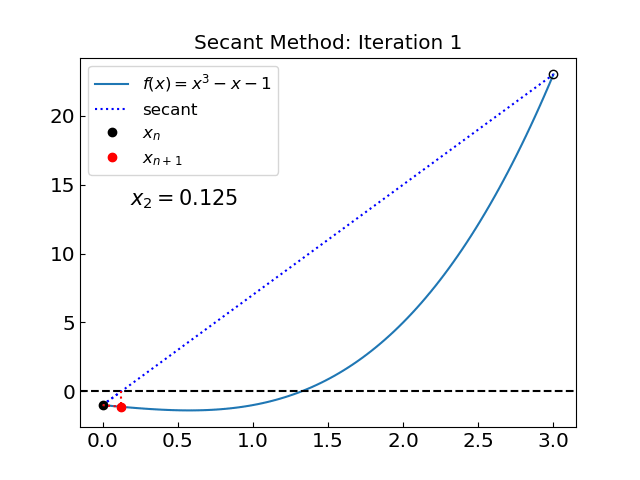

In [13]:
func = func2
labelfunc = '${f(x) = x^3 - x - 1}$'
labelgif = 'secant-func2.gif'

a0 = 0.
b0 = 3.

ani = secant_animation(func, labelfunc, 0, 3.)

ani.save(labelgif)

from IPython.display import display, Image
display(Image(filename=labelgif))

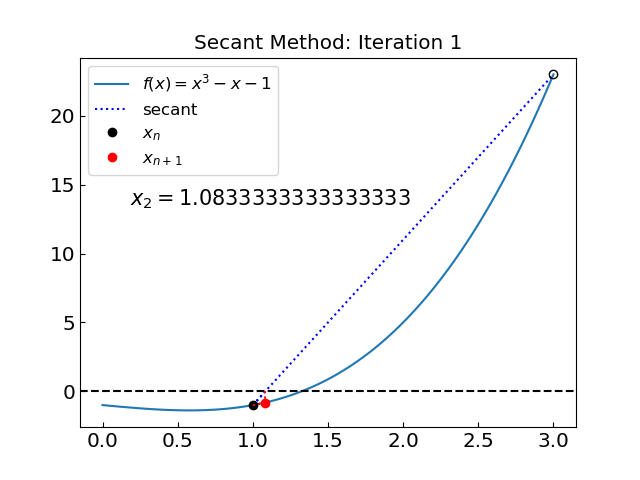

In [14]:
func = func2
labelfunc = '${f(x) = x^3 - x - 1}$'
labelgif = 'secant-func2-better.gif'

a0 = 0.
b0 = 3.

ani = secant_animation(func, labelfunc, 1., 3.)

ani.save(labelgif)

from IPython.display import display, Image
display(Image(filename=labelgif))

In [15]:
def func1(x):
    return x + np.exp(-x) - 2.

def dfunc1(x):
    return 1. - np.exp(-x)
    
def func2(x):
    return x**3 - x - 1.

def dfunc2(x):
    return 3.*x**2 - 1.


last_newton_iterations = 0

def newton_method_full(
    f,                    # The function whose root we are trying to find
    df,                   # The derivative of the function
    x0,                   # The initial guess
    tolerance = 1.e-10,   # The desired accuracy of the solution
    max_iterations = 100  # Maximum number of iterations
    ):
    
    ret = []
    
    xprev = x0
    
    ret.append(xprev)
    
    global last_newton_iterations
    last_newton_iterations = 0
    
    for i in range(max_iterations):
        last_newton_iterations += 1
           
        fval  = f(xprev)                       # The current function value
        dfval = df(xprev)                      # The current function derivative value
        
        xnew = xprev - fval / dfval            # The next iteration

        ret.append(xnew)
        
        if (abs(xnew-xprev) < tolerance):
            return ret
        
        xprev = xnew
    
    print("Newton-Raphson method failed to converge to a required precision in " + str(max_iterations) + " iterations")
    print("The error estimate is ", abs(xnew - xprev))
    
    return ret                   

In [16]:
# Animation
from matplotlib.animation import FuncAnimation

def newton_animation(func, dfunc, labelfunc, x0, tolerance = 1.e-10):
    # Solve the root
    xroot = newton_method_full(func, dfunc, x0)
    xref = np.linspace(a0,b0,100)
    fref = func(xref)
    
    # Prepare plot
    fig, ax = plt.subplots()
    
    plt.xlabel("x")
    plt.ylabel("f(x)")
    plt.title("Newton-Raphson Method")
    plt.plot(xref,fref, label = labelfunc)
    plt.axhline(y = 0., color = 'black', linestyle = '--')
    
    def animate_newton(ind):
        x0 = xroot[ind]
        f0 = func(x0)
        df0 = dfunc(x0)
        
        xnew = x0 - f0/df0
        
        labxn = "${x_{" + str(ind) + "}}$";
        labxn1 = "${x_{" + str(ind+1) + "}}$";
        
        xleft  = min([a,x0,xnew])
        xright = max([b,x0,xnew])
        xref = np.linspace(xleft,xright,100)
        fref = func(xref)
    
        ax.clear();
        plt.title("Newton-Raphson Method: Iteration " + str(ind + 1))
        plt.plot(xref,fref, label = labelfunc)
        plt.axhline(y = 0., color = 'black', linestyle = '--')
        plt.plot([xleft,xright], [f0-df0*x0 +df0*xleft,f0-df0*x0 + df0*xright], linestyle = '--', color = 'red', label='tangent')
        plt.plot([x0], [func(x0)], 'o',color = 'black', label = labxn)
        plt.plot([xnew], [func(xnew)], 'o',color = 'red', label = labxn1)
        plt.plot([xnew,xnew], [0,func(xnew)], linestyle = ':', color = 'red')
        labx = '${x_{' + str(ind+1) + '} = ' + str(xnew) + '}$'
        ax.text(0.35, 0.05, labx, transform=ax.transAxes, size = 15)
        plt.legend()
        if (ylow < yhigh):
            plt.ylim(ylow,yhigh)
            plt.legend(loc="lower right")
        if (ind == len(xroot) - 1):
            plt.close(fig)
        #plt.show()
    
    ani_ret = FuncAnimation(fig, animate_newton, frames=len(xroot), interval=2000, repeat=False)
    # plt.close(fig)
    return ani_ret
    

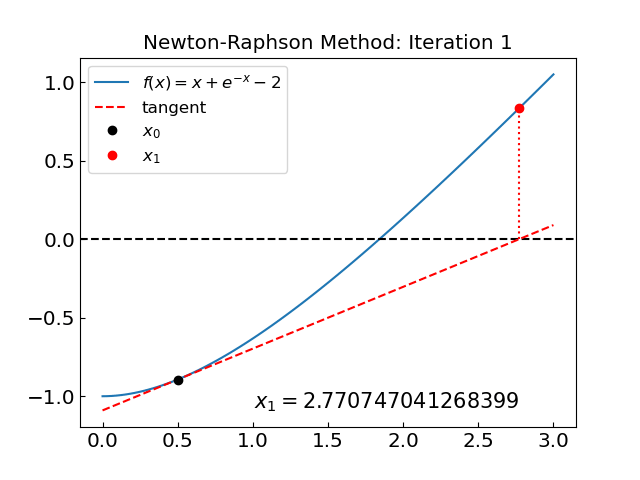

In [17]:
func = func1
dfunc = dfunc1
labelfunc = '${f(x) = x + e^{-x} - 2}$'
labelgif = 'newton-func1.gif'

x0 = 0.5
a = 0
b = 3
ylow = yhigh = -1.

ani = newton_animation(func, dfunc, labelfunc, x0)

ani.save(labelgif)

from IPython.display import display, Image
display(Image(filename=labelgif))

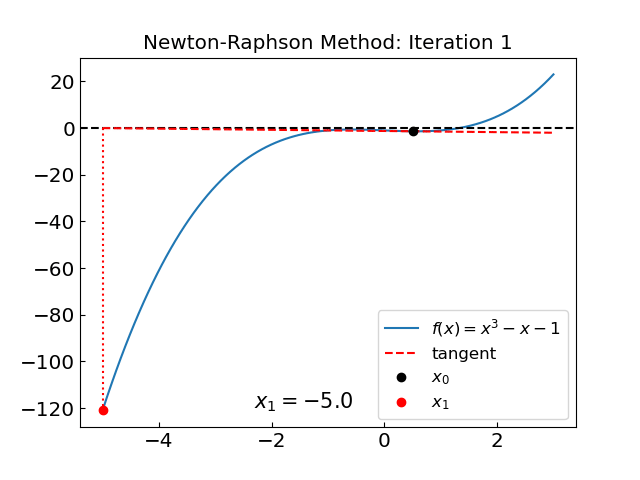

In [18]:
func = func2
dfunc = dfunc2
labelfunc = '${f(x) = x^3 - x - 1}$'
labelgif = 'newton-func2.gif'

x0 = 0.5
a = 0
b = 3
ylow = yhigh = -1.

ani = newton_animation(func, dfunc, labelfunc, x0)

ani.save(labelgif)

from IPython.display import display, Image
display(Image(filename=labelgif))

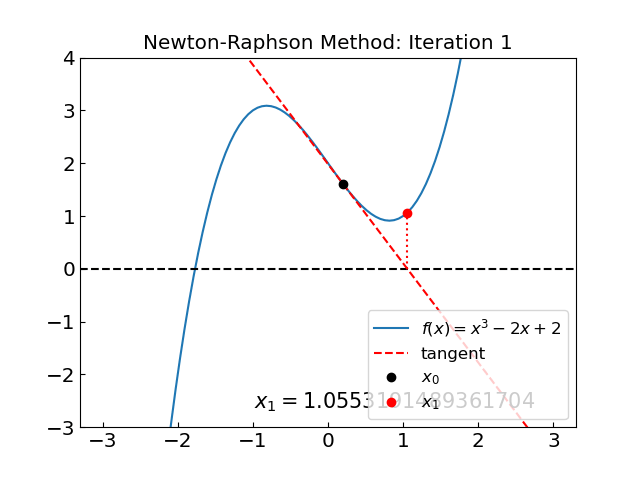

In [19]:
def func3(x):
    return x**3 - 2. * x + 2.

def dfunc3(x):
    return 3. * x**2 - 2.

func = func3
dfunc = dfunc3
labelfunc = '${f(x) = x^3 - 2x + 2}$'
labelgif = 'newton-func3.gif'

a = -3.
b = 3.
ylow = -3.
yhigh = 4.
x0 = 0.2

ani = newton_animation(func, dfunc, labelfunc, x0)

ani.save(labelgif)

from IPython.display import display, Image
display(Image(filename=labelgif))

In [20]:
def funcGSS(x):
    return np.sin(x)

import math
import numpy as np

phi = (math.sqrt(5) + 1) / 2

# Golden section search
def gss_full(
    f,                    # The function whose root we are trying to find
    a,                    # The left boundary
    b,                    # The right boundary
    tolerance = 1.e-10,   # The desired accuracy of the solution
    ):
    ret = []
    fa = f(a)                           # The value of the function at the left boundary
    fb = f(b)                           # The value of the function at the right boundary
    c = b - (b - a) / phi               # Candidate left boundary
    d = a + (b - a) / phi               # Candidate right boundary
    while abs(b - a) > tolerance:
        fc = f(c)
        fd = f(d)

        ret.append([a,b,c,d,fa,fb,fc,fd])

        if fc < fd: 
            b = d
            fb = fd
        else:
            a = c
            fa = fc

        c = b - (b - a) / phi
        d = a + (b - a) / phi

    return ret
    

xleft = 0.
xright = 2. * math.pi
print("Golden section search:")
res = gss_full(funcGSS,xleft,xright, 1.e-10)
print("The minimum of sin(x) over the interval (",xleft,",",xright,") is at x =",res[-1][0])


Golden section search:
The minimum of sin(x) over the interval ( 0.0 , 6.283185307179586 ) is at x = 4.712388990795711


In [21]:
# Animation
from matplotlib.animation import FuncAnimation

def gss_animation(func, labelfunc, a, b, tolerance = 1.e-10):
    # Solve the root
    xroot = gss_full(func,a,b)
    xref = np.linspace(a,b,100)
    fref = func(xref)
    
    # Prepare plot
    fig, ax = plt.subplots()
    
    plt.xlabel("x")
    plt.ylabel("f(x)")
    plt.title("Golden Section Search")
    plt.plot(xref,fref, label = labelfunc)
    plt.axhline(y = 0., color = 'black', linestyle = '--')
    
    def animate_gss(ind):
        ax.clear()
        plt.title("Golden Section Search: Iteration " + str(ind + 1))
        plt.plot(xref,fref, label = labelfunc)
        plt.axhline(y = 0., color = 'black', linestyle = '--')

        a = xroot[ind][0]
        b = xroot[ind][1]
        c = xroot[ind][2]
        d = xroot[ind][3]
        fa = xroot[ind][4]
        fb = xroot[ind][5]
        fc = xroot[ind][6]
        fd = xroot[ind][7]

        plt.plot([a,a], [0,fa], color = 'orange')
        plt.scatter([a],[fa], color = 'orange', label = 'a')
        plt.plot([b,b], [0,fb], color = 'green')
        plt.scatter([b],[fb], color = 'green', label = 'b')
        plt.plot([c,c], [0,fc], color = 'blue')
        plt.scatter([c],[fc], color = 'blue', label = 'c')
        plt.plot([d,d], [0,fd], color = 'red')
        plt.scatter([d],[fd], color = 'red', label = 'd')
        labx = '${x_{' + str(ind+1) + '} = ' + str(0.5*(a+b)) + '}$'
        ax.text(0.04, 0.1, labx, transform=ax.transAxes, size = 15)
        plt.legend()
        if (ind == len(xroot) - 1):
            plt.close(fig)
        #plt.show()
    
    ani_ret = FuncAnimation(fig, animate_gss, frames=len(xroot), interval=2000, repeat=False)
    # plt.close(fig)
    return ani_ret
    

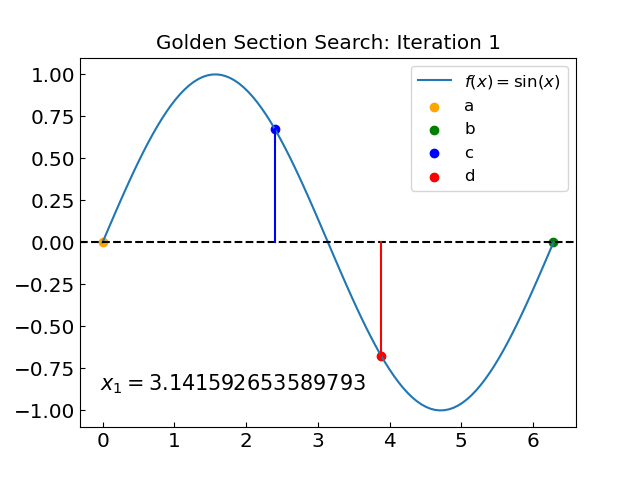

In [22]:
def funcGSS(x):
    return np.sin(x)

labelfuncGSS = '${f(x) = \sin(x)}$'
labelgif = 'gss.gif'

ani = gss_animation(funcGSS, labelfuncGSS, 0, 2. * math.pi)

ani.save(labelgif)

from IPython.display import display, Image
display(Image(filename=labelgif))